# Decision Tree,Random Forest,SVM & Naive Bayes Classification and Visualization

### 1. Decision Tree Classification

In [1]:

import pandas as pd
import numpy as mp
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.naive_bayes import MultinomialNB
import io
from scipy import misc
from sklearn.svm import SVC 

from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv("job-experience.csv")
features = data.columns
features

Index(['Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'YearsWithCurrManager', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [3]:
features = ['DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount','EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'YearsWithCurrManager', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']
train, test = train_test_split(data, test_size = 0.35,random_state=30)
print(len(train))
print(len(test))
c= DecisionTreeClassifier(min_samples_split = 100)
x_train = train[features]
y_train = train["Attrition"]
x_test = test[features]
y_test = test["Attrition"]
dt = c.fit(x_train, y_train)

955
515


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


Accuracy using desicion Tree:  81.0 %


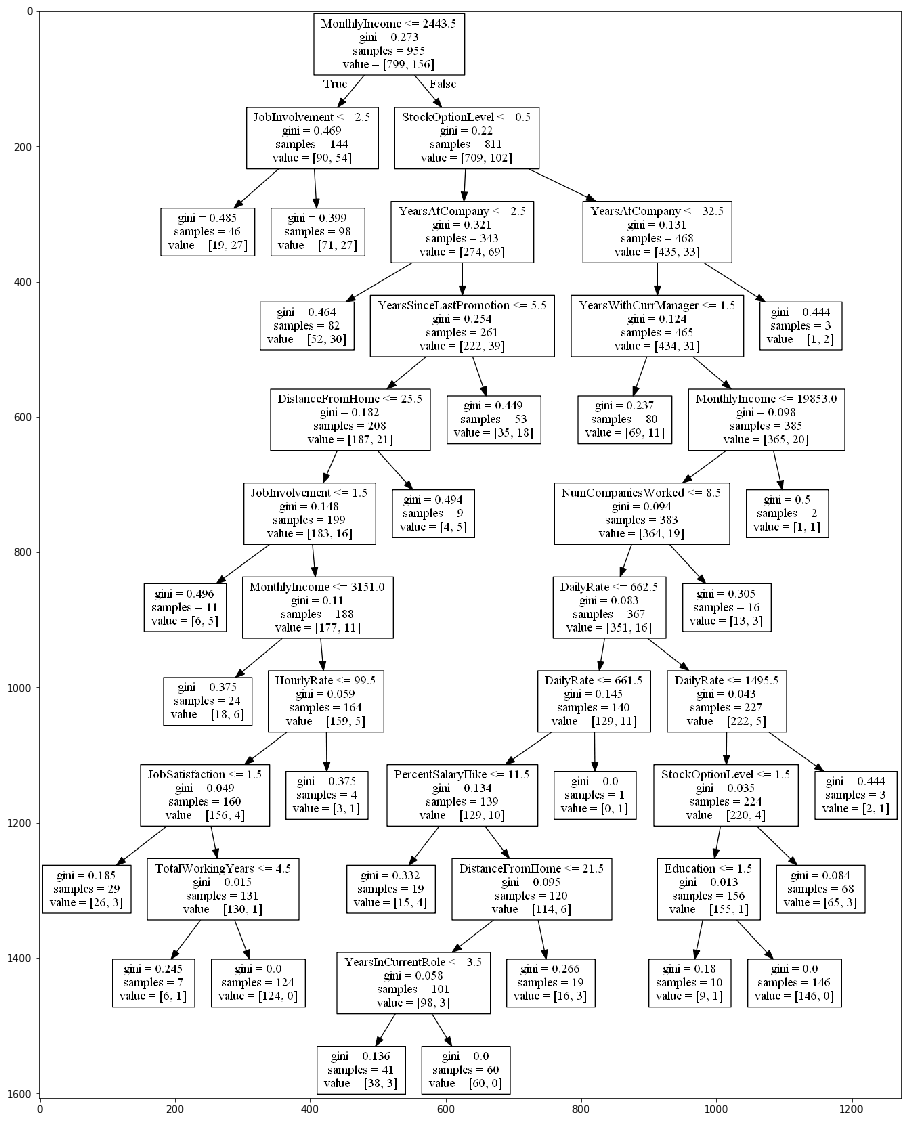

In [4]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names= features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)
    
show_tree(dt, features, 'tree.png')
show_tree(dt, features, 'tree.pdf')
y_pred = c.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

In [5]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[408  26]
 [ 72   9]]
              precision    recall  f1-score   support

          No       0.85      0.94      0.89       434
         Yes       0.26      0.11      0.16        81

   micro avg       0.81      0.81      0.81       515
   macro avg       0.55      0.53      0.52       515
weighted avg       0.76      0.81      0.78       515



### 2. Random Forest Classification

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, metrics

In [7]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [8]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
y_pred= forest.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.8466019417475729


In [10]:

estimator = forest.estimators_[5]


from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree2.dot', 
                feature_names = features,
                class_names = "Attrition",
                rounded = True, proportion = False, 
                precision = 2, filled = True)


from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)*100 
print("Accuracy using Random forest Tree: ",round(score, 1), "%" )
Image(filename = 'tree2.png')

Accuracy using Random forest Tree:  84.7 %


In [11]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[428   6]
 [ 73   8]]
              precision    recall  f1-score   support

          No       0.85      0.99      0.92       434
         Yes       0.57      0.10      0.17        81

   micro avg       0.85      0.85      0.85       515
   macro avg       0.71      0.54      0.54       515
weighted avg       0.81      0.85      0.80       515



### 3. SVM Classification 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
score = accuracy*100 
print("Accuracy using SVM: ",round(score, 1), "%" )

Accuracy using SVM:  84.3 %


In [15]:
data.head()

,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,Yes,1102,1,2,1,1,2,94,3,2,...,3,1,80,0,8,0,1,6,4,0
1,No,279,8,1,1,2,3,61,2,2,...,4,4,80,1,10,3,3,10,7,1
2,Yes,1373,2,2,1,4,4,92,2,1,...,3,2,80,0,7,3,3,0,0,0
3,No,1392,3,4,1,5,4,56,3,1,...,3,3,80,0,8,3,3,8,7,3
4,No,591,2,1,1,7,1,40,3,1,...,3,4,80,1,6,3,3,2,2,2


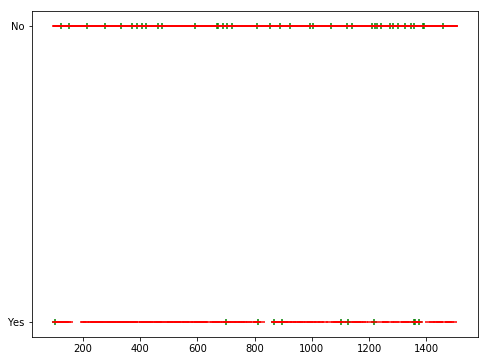

In [16]:
import matplotlib.pyplot as plt
x = data['DailyRate']
y = data['Attrition']

setest_x = x[:50]
setest_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setest_x,setest_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

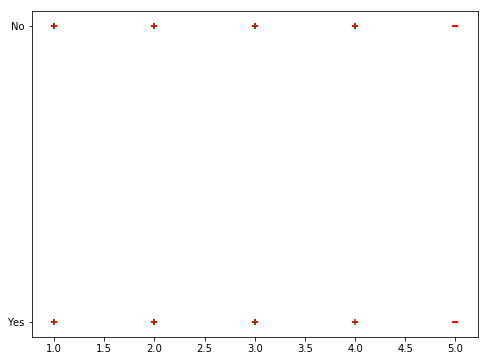

In [17]:
x = data['Education']
y = data['Attrition']

setest_x = x[:50]
setest_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setest_x,setest_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [18]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[434   0]
 [ 81   0]]
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       434
         Yes       0.00      0.00      0.00        81

   micro avg       0.84      0.84      0.84       515
   macro avg       0.42      0.50      0.46       515
weighted avg       0.71      0.84      0.77       515



C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4. Naive Bayes Classification

In [19]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
prediction = nb.predict(x_test)
y_pred=nb.predict(x_test)

In [21]:
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Naive Bayes: ", round(score, 1), "%" )

Accuracy using Naive Bayes:  51.8 %


In [22]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[220 214]
 [ 34  47]]
              precision    recall  f1-score   support

          No       0.87      0.51      0.64       434
         Yes       0.18      0.58      0.27        81

   micro avg       0.52      0.52      0.52       515
   macro avg       0.52      0.54      0.46       515
weighted avg       0.76      0.52      0.58       515

